<a href="https://colab.research.google.com/github/StratosFair/Mean_Escape_Time/blob/main/Duffin_oscillator/Plots/DO_parameters_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
try:
    import dolfin
except ImportError:
    !wget "https://fem-on-colab.github.io/releases/fenics-install-release-real.sh" -O "/tmp/fenics-install.sh" && bash "/tmp/fenics-install.sh"
    import dolfin

--2025-07-30 15:32:36--  https://fem-on-colab.github.io/releases/fenics-install-release-real.sh
Resolving fem-on-colab.github.io (fem-on-colab.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to fem-on-colab.github.io (fem-on-colab.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4180 (4.1K) [application/x-sh]
Saving to: ‘/tmp/fenics-install.sh’

/tmp/fenics-install 100%[===================>]   4.08K  --.-KB/s    in 0s      

2025-07-30 15:32:36 (38.1 MB/s) - ‘/tmp/fenics-install.sh’ saved [4180/4180]

+ INSTALL_PREFIX=/usr/local
++ echo /usr/local
++ awk -F/ '{print NF-1}'
+ INSTALL_PREFIX_DEPTH=2
+ PROJECT_NAME=fem-on-colab
+ SHARE_PREFIX=/usr/local/share/fem-on-colab
+ FENICS_INSTALLED=/usr/local/share/fem-on-colab/fenics.installed
+ [[ ! -f /usr/local/share/fem-on-colab/fenics.installed ]]
+ PYBIND11_INSTALL_SCRIPT_PATH=https://github.com/fem-on-colab/fem-on-colab.github.io/raw/a6a74cc7/releases/pybi

In [ ]:
import fenics as fe
import mshr as msh
from matplotlib import pyplot

#  Duffing oscillator process in a ball of $\mathbb{R}^2$ : computation of solutions using Finite Element Method

Based on the paper [A neural network solution of first-passage problems](https://link.springer.com/article/10.1007/s10483-024-3189-8) (Jiamin Qian, Lincong Chen & J. Q. Sun, Oct. 2024), the 2-dimensional Duffing oscillator is defined by:
$$ d \begin{pmatrix} X_1(t)\\
X_2(t) \end{pmatrix} = \begin{pmatrix} X_2\\
-X_1 - X_1^3 - 2\zeta X_2 \end{pmatrix} dt + \begin{pmatrix} \sqrt{2\varepsilon}dB_1(t)\\
\sqrt{2\zeta} dB_2(t) \end{pmatrix}$$

The infinitesimal generator of this process is given for sufficiently smooth $f$ by
$$\mathscr Lf: x \mapsto b(x) \cdot \nabla f(x) + a(x) : \nabla^2 f(x)$$
where
$$b : x = (x_1, x_2)^T \mapsto \begin{pmatrix} x_2\\ -x_1 - x_1^3 - 2\zeta x_2 \end{pmatrix}  $$
and
$$a:x \mapsto \frac12 \sigma(x)\sigma(x)^T = \begin{pmatrix} \varepsilon & 0\\ 0 & \zeta\end{pmatrix} $$

## 1) The PDE problem

The Mean Escape Time (MET) $\tau$ is solution of the following elliptic problem

$$\begin{cases}\mathscr L\tau = -1 \quad \text{in } \Omega,\\
\tau= 0 \quad\text{ on }\partial\Omega\end{cases} $$

##2) The variational formulation

Because $\mathscr L$ is a second-order elliptic operator, we need to use integration by parts to make the PDE solvable in a traditional FEM solver. To do so, we multiply the PDE with a test function $v\in \hat V$, which belongs in the test function space $\hat V$. We then integrate over $\Omega$:
$$\begin{align*}\int_\Omega\mathscr L\tau\cdot v = -\int_\Omega v &\implies \int_\Omega \Big(x_2\partial_{x_1}\tau(x) - (x_1 + x_1^3 + 2\zeta x_2)\partial_{x_2} \tau(x) + \varepsilon \partial^2_{x_1,x_1}\tau(x) + \zeta \partial^2_{x_2,x_2}\tau(x) + 1\Big)v(x)dx = 0 \end{align*} $$

The first order derivatives of $\tau$ can be handled just fine by the solver, but the second order derivatives can't, hence we apply integration by parts to get the following weak formulation:

$$\int_\Omega \Big[\Big(x_2\partial_{x_1}\tau(x) - (x_1 + x_1^3 + 2\zeta x_2)\partial_{x_2} \tau(x)\Big)v(x) - \varepsilon \partial_{x_1}\tau(x)\partial_{x_1}v(x) - \zeta \partial_{x_2}\tau(x)\partial_{x_2}v(x)\Big] dx = - \int_\Omega v(x) dx$$

Which can be equivalently rewritten as

$$ a[\tau, v] = L(v) $$

Where $a$ is the bilinear form defined as

$$a : (\tau, v)\mapsto \int_\Omega \Big[\Big(x_2\partial_{x_1}\tau(x) - (x_1 + x_1^3 + 2\zeta x_2)\partial_{x_2} \tau(x)\Big)v(x) - \varepsilon \partial_{x_1}\tau(x)\partial_{x_1}v(x) - \zeta \partial_{x_2}\tau(x)\partial_{x_2}v(x)\Big] dx, $$

which equivalently reads

$$a : (\tau, v)\mapsto \int_\Omega \nabla\tau(x) \cdot b(x) v(x) - \text{diag}(\varepsilon, \zeta)\nabla\tau(x)\cdot\nabla v(x) dx$$

and $L$ is the linear form defined as

$$L : v\mapsto - \int_\Omega v(x) dx $$

## 3) FEniCS implementation

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling element ffc_element_780eb9ddb42feb9c6996c1225460f0d8c3f18bb9

INFO:FFC:Compiler stage 1: Analyzing element(s)
INFO:FFC:--------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.00246954 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 1 elements
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 1 dofmaps
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 0 coordinate mappings
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.962102 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representation
INFO:FFC:----------------------------

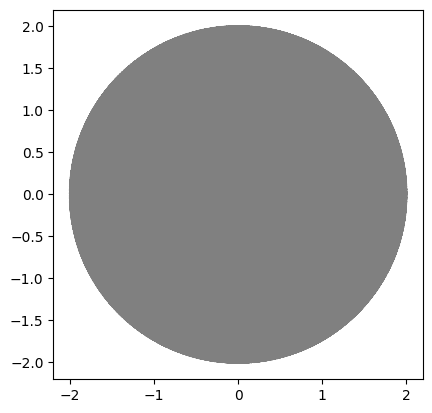

In [ ]:
#create mesh and define function space
radius = 2
domain = msh.Circle(fe.Point(0, 0), radius)
mesh = msh.generate_mesh(domain, 30)

V = fe.FunctionSpace(mesh, "P", 3)
tau_b = fe.Constant(0.0)

def boundary(x, on_boundary):
    return on_boundary

bc = fe.DirichletBC(V, tau_b, boundary)

In [ ]:
zeta = 0.08
eps = 0.001

tau = fe.TrialFunction(V)
v = fe.TestFunction(V)
f = fe.Constant(-1.0)

b = fe.Expression(("x[1]", "-x[0] - pow(x[0],3) -2*zeta *x[1]"), degree=3, zeta = zeta)
diag =  fe.Expression((("eps", 0), (0, "zeta")), degree = 0, eps=eps, zeta=zeta)

a = (fe.dot(fe.dot(fe.grad(tau),b), v) - fe.dot(fe.dot(diag, fe.grad(tau)), fe.grad(v)))*fe.dx
L = f * v * fe.dx

In [ ]:
# Compute solution
tau_h = fe.Function(V)
fe.solve(a == L, tau_h, bc)

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_cc8439ecd2bf4d801848ade27f420b1b2f5436fc

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:FFC:  
INFO:FFC:  Geometric dimension:       2
  Number of cell subdomains: 0
  Rank:                      1
  Arguments:                 '(v_0)'
  Number of coefficients:    1
  Coefficients:              '[f_71]'
  Unique elements:           'CG3(?,?), R0(?,?), Vector<2 x CG1(?,?)>'
  Unique sub elements:       'CG3(?,?), R0(?,?), Vector<2 x CG1(?,?)>, CG1(?,?)'
  
INFO:FFC:  representation:    auto --> uflacs
INFO:FFC:  quadrature_rule:   auto --> default
INFO:FFC:  quadrature_degree: auto --> 3
INFO:FFC:  quadrature_degree: 3
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.0539949 seconds.

INFO:FFC:Compile

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling element ffc_element_3801828c0f66b7190a7fd5819465b3d5b34b9149

INFO:FFC:Compiler stage 1: Analyzing element(s)
INFO:FFC:--------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.00233626 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 1 elements
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 1 dofmaps
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 0 coordinate mappings
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.00822687 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representat

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling element ffc_element_4f750817ecc896f3bedcb4ff8c9f3352153b1b38

INFO:FFC:Compiler stage 1: Analyzing element(s)
INFO:FFC:--------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.00391245 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 1 elements
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 1 dofmaps
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 0 coordinate mappings
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.0139549 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representati

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling element ffc_element_17d5bd7e022a45e71c9f390bd00f3f09885a1fd0

INFO:FFC:Compiler stage 1: Analyzing element(s)
INFO:FFC:--------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.00254512 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 1 elements
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 1 dofmaps
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 0 coordinate mappings
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.0100207 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representati

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling coordinate_mapping ffc_coordinate_mapping_3720490578293ae8ad5feabedc46584f48fda4c4

INFO:FFC:Compiler stage 1: Analyzing coordinate_mapping(s)
INFO:FFC:-------------------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.00237298 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 0 elements
INFO:FFC:  Computing representation of 0 dofmaps
INFO:FFC:  Computing representation of 1 coordinate mappings
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.0123622 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representation
INFO:FFC:--------------------------------------------------------
INFO

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_94c8ff4c2c24211b07ce143713155b1aadfb7055

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:FFC:  
INFO:FFC:  Geometric dimension:       2
  Number of cell subdomains: 0
  Rank:                      2
  Arguments:                 '(v_0, v_1)'
  Number of coefficients:    2
  Coefficients:     

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling element ffc_element_41fc19b0227ffaf8fed5947dd0f32b7293c796d5

INFO:FFC:Compiler stage 1: Analyzing element(s)
INFO:FFC:--------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.00320697 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 1 elements
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 1 dofmaps
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 0 coordinate mappings
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.0173688 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representati

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling element ffc_element_cd40aaaf5bc0b68be1a587d7bb9a08da6d0820e7

INFO:FFC:Compiler stage 1: Analyzing element(s)
INFO:FFC:--------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.00442863 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 1 elements
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 1 dofmaps
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 0 coordinate mappings
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.0120001 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representati

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling element ffc_element_b88422bb6288ae5f252543951e538a5155ab4845

INFO:FFC:Compiler stage 1: Analyzing element(s)
INFO:FFC:--------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.00276399 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 1 elements
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 1 dofmaps
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 0 coordinate mappings
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.0106583 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representati

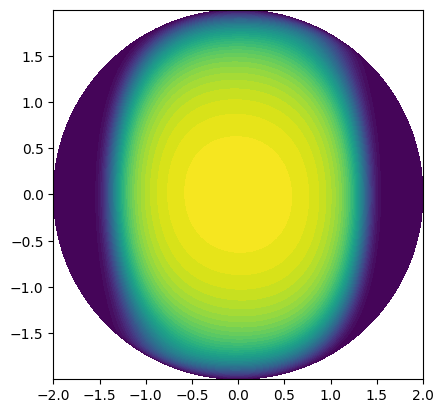

In [ ]:
fe.plot(tau_h)

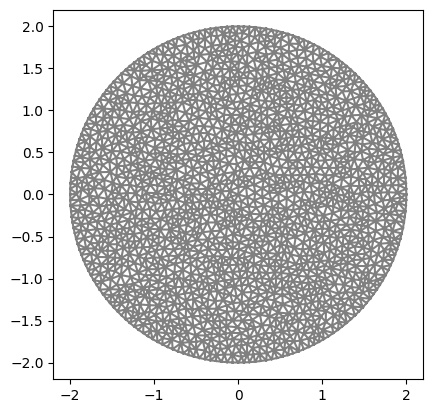

In [ ]:
fe.plot(mesh)

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling element ffc_element_780eb9ddb42feb9c6996c1225460f0d8c3f18bb9

INFO:FFC:Compiler stage 1: Analyzing element(s)
INFO:FFC:--------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.00285149 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 1 elements
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 1 dofmaps
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 0 coordinate mappings
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.914902 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representation
INFO:FFC:----------------------------

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_cc8439ecd2bf4d801848ade27f420b1b2f5436fc

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:FFC:  
INFO:FFC:  Geometric dimension:       2
  Number of cell subdomains: 0
  Rank:                      1
  Arguments:                 '(v_0)'
  Number of coefficients:    1
  Coefficients:              '[f_16]'
  Unique elements:           'CG3(?,?), R0(?,?), Vector<2 x CG1(?,?)>'
  Unique sub elements:       'CG3(?,?), R0(?,?), Vector<2 x CG1(?,?)>, CG1(?,?)'
  
INFO:FFC:  representation:    auto --> uflacs
INFO:FFC:  quadrature_rule:   auto --> default
INFO:FFC:  quadrature_degree: auto --> 3
INFO:FFC:  quadrature_degree: 3
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.0485051 seconds.

INFO:FFC:Compile

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling element ffc_element_3801828c0f66b7190a7fd5819465b3d5b34b9149

INFO:FFC:Compiler stage 1: Analyzing element(s)
INFO:FFC:--------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.00439262 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 1 elements
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 1 dofmaps
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 0 coordinate mappings
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.0133214 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representati

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling element ffc_element_4f750817ecc896f3bedcb4ff8c9f3352153b1b38

INFO:FFC:Compiler stage 1: Analyzing element(s)
INFO:FFC:--------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.00242138 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 1 elements
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 1 dofmaps
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 0 coordinate mappings
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.0125573 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representati

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling element ffc_element_17d5bd7e022a45e71c9f390bd00f3f09885a1fd0

INFO:FFC:Compiler stage 1: Analyzing element(s)
INFO:FFC:--------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.00298309 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 1 elements
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 1 dofmaps
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 0 coordinate mappings
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.0128129 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representati

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling coordinate_mapping ffc_coordinate_mapping_3720490578293ae8ad5feabedc46584f48fda4c4

INFO:FFC:Compiler stage 1: Analyzing coordinate_mapping(s)
INFO:FFC:-------------------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.00234246 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 0 elements
INFO:FFC:  Computing representation of 0 dofmaps
INFO:FFC:  Computing representation of 1 coordinate mappings
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.0105007 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representation
INFO:FFC:--------------------------------------------------------
INFO

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_94c8ff4c2c24211b07ce143713155b1aadfb7055

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:FFC:  
INFO:FFC:  Geometric dimension:       2
  Number of cell subdomains: 0
  Rank:                      2
  Arguments:                 '(v_0, v_1)'
  Number of coefficients:    2
  Coefficients:     

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling element ffc_element_41fc19b0227ffaf8fed5947dd0f32b7293c796d5

INFO:FFC:Compiler stage 1: Analyzing element(s)
INFO:FFC:--------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.00349593 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 1 elements
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 1 dofmaps
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 0 coordinate mappings
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.0147328 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representati

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling element ffc_element_cd40aaaf5bc0b68be1a587d7bb9a08da6d0820e7

INFO:FFC:Compiler stage 1: Analyzing element(s)
INFO:FFC:--------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.00270867 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 1 elements
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 1 dofmaps
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 0 coordinate mappings
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.0121078 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representati

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling element ffc_element_b88422bb6288ae5f252543951e538a5155ab4845

INFO:FFC:Compiler stage 1: Analyzing element(s)
INFO:FFC:--------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.00375938 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 1 elements
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 1 dofmaps
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 0 coordinate mappings
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.0149751 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representati

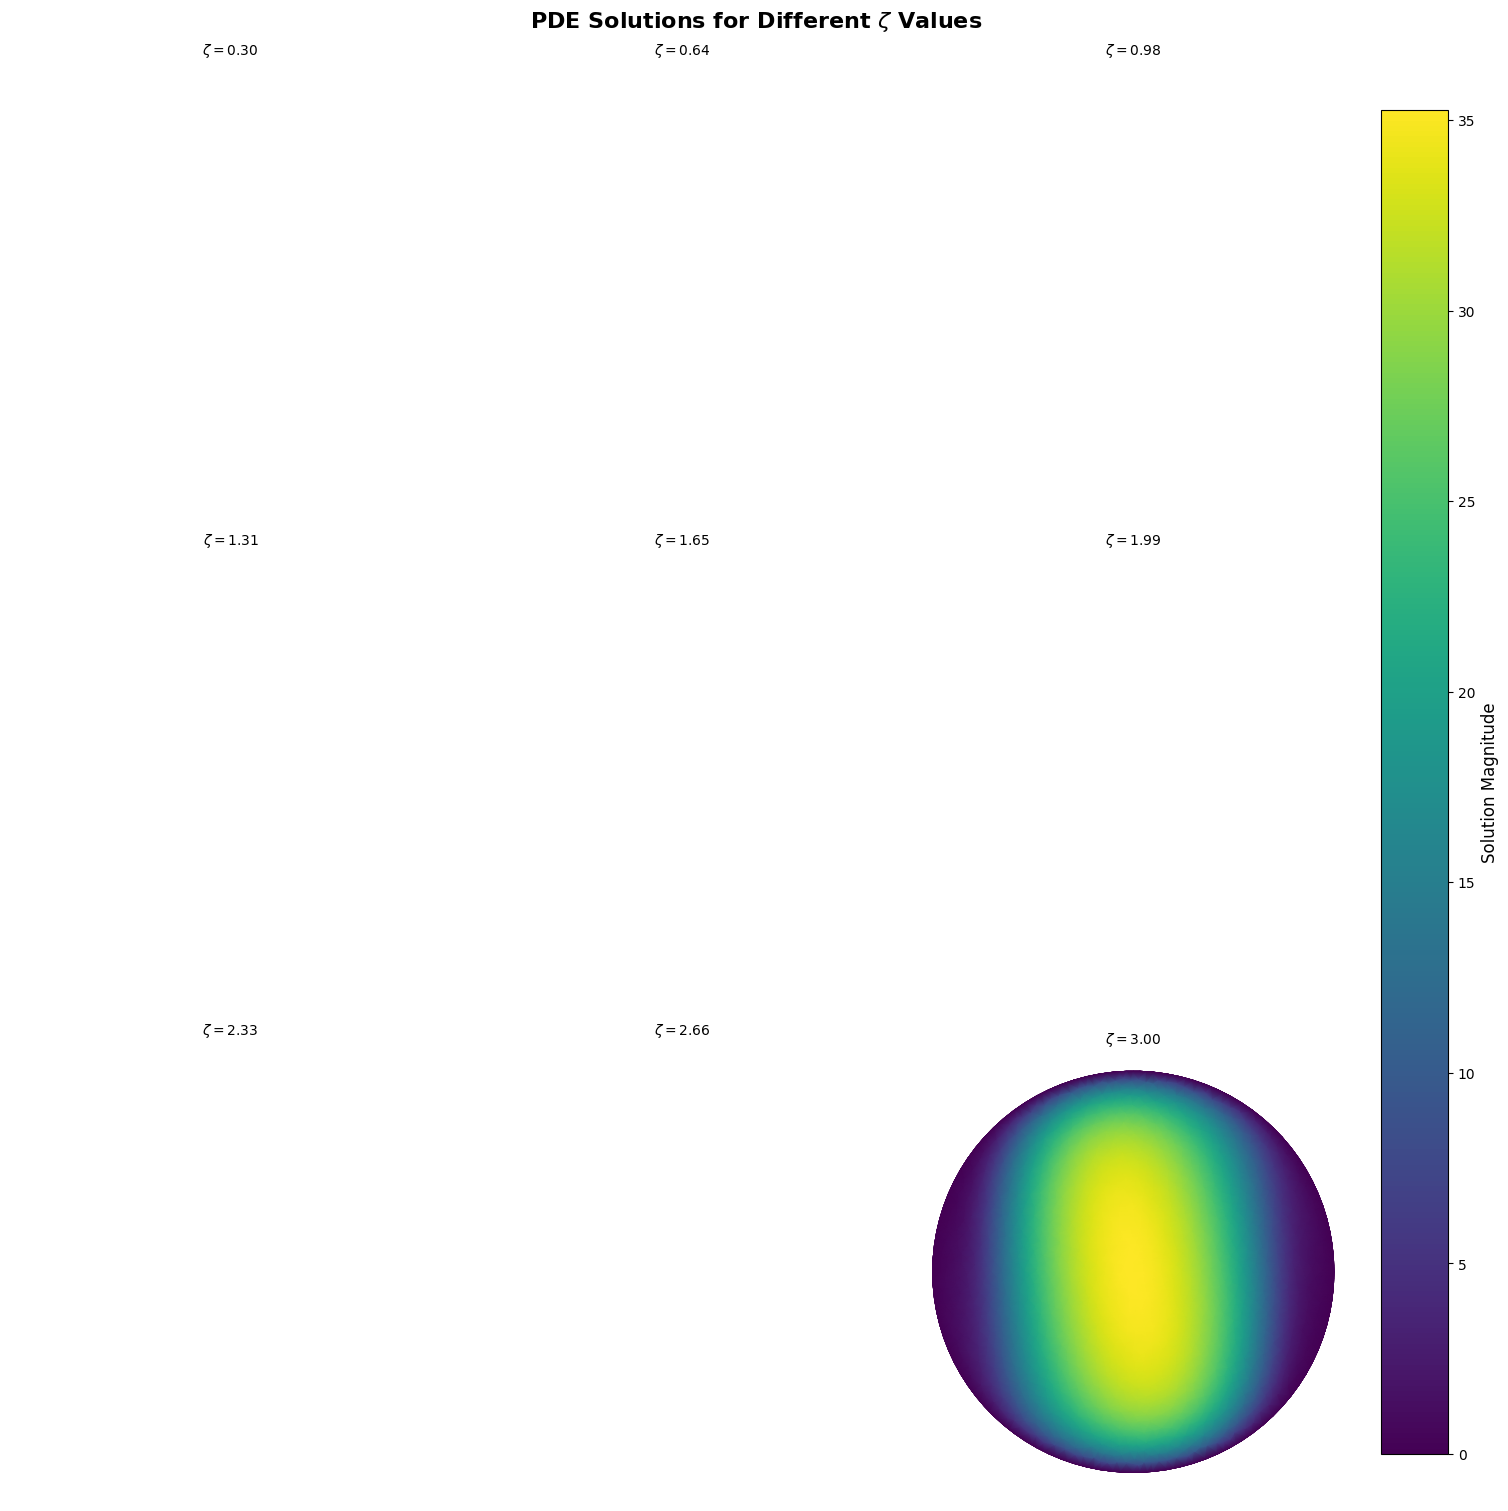

In [3]:
import fenics as fe
import mshr as msh
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm

# Fixed parameters
radius = 2
eps = 1e-3
zetas = np.linspace(0.3, 3, 9).tolist()  # Range of zeta values

# Create the mesh and function space
domain = msh.Circle(fe.Point(0, 0), radius)
mesh = msh.generate_mesh(domain, 30)
V = fe.FunctionSpace(mesh, "P", 3)  # Cubic Lagrange elements

# Define boundary condition
tau_b = fe.Constant(0.0)

def boundary(x, on_boundary):
    return on_boundary

bc = fe.DirichletBC(V, tau_b, boundary)

# Test and trial functions, and source term
tau = fe.TrialFunction(V)
v = fe.TestFunction(V)
f = fe.Constant(-1.0)

# Set up the 3x3 grid for plotting
fig, axes = plt.subplots(3, 3, figsize=(15, 15), constrained_layout=True)
fig.suptitle("PDE Solutions for Different $\\zeta$ Values", fontsize=16, weight="bold")

# Collect all solution values for color bar scaling
all_tau_values = []

# Solve for each zeta and plot the result
for idx, zeta in enumerate(zetas):
    i, j = divmod(idx, 3)
    ax = axes[i, j]

    # Define the vector field `b` and the diffusion tensor `diag`
    b = fe.Expression(("x[1]", "-x[0] - pow(x[0],3) - 2*zeta*x[1]"), degree=3, zeta=zeta)
    diag = fe.Expression((("eps", "0"), ("0", "zeta")), degree=0, eps=eps, zeta=zeta)

    # Define bilinear and linear forms
    a = (fe.dot(fe.dot(fe.grad(tau), b), v) - fe.dot(fe.dot(diag, fe.grad(tau)), fe.grad(v))) * fe.dx
    L = f * v * fe.dx

    # Compute the solution
    tau_h = fe.Function(V)
    fe.solve(a == L, tau_h, bc)

    # Compute the solution values for the color bar scaling
    tau_values = tau_h.compute_vertex_values(mesh)
    all_tau_values.extend(tau_values)

    # Plot the solution
    plot = fe.plot(tau_h, mesh=mesh, mode="color", cmap="viridis", vmin=None, vmax=None)
    ax.set_title(f"$\\zeta={zeta:.2f}$", fontsize=10, weight="bold")
    ax.axis("off")

# Add a shared colorbar
all_tau_values = np.array(all_tau_values)
min_tau, max_tau = all_tau_values.min(), all_tau_values.max()
norm = plt.Normalize(vmin=min_tau, vmax=max_tau)
sm = cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])

# Add colorbar to the figure
cbar = fig.colorbar(sm, ax=axes, orientation="vertical", fraction=0.05, pad=0.02)
cbar.set_label("Solution Magnitude", fontsize=12)
cbar.ax.tick_params(labelsize=10)

plt.show()

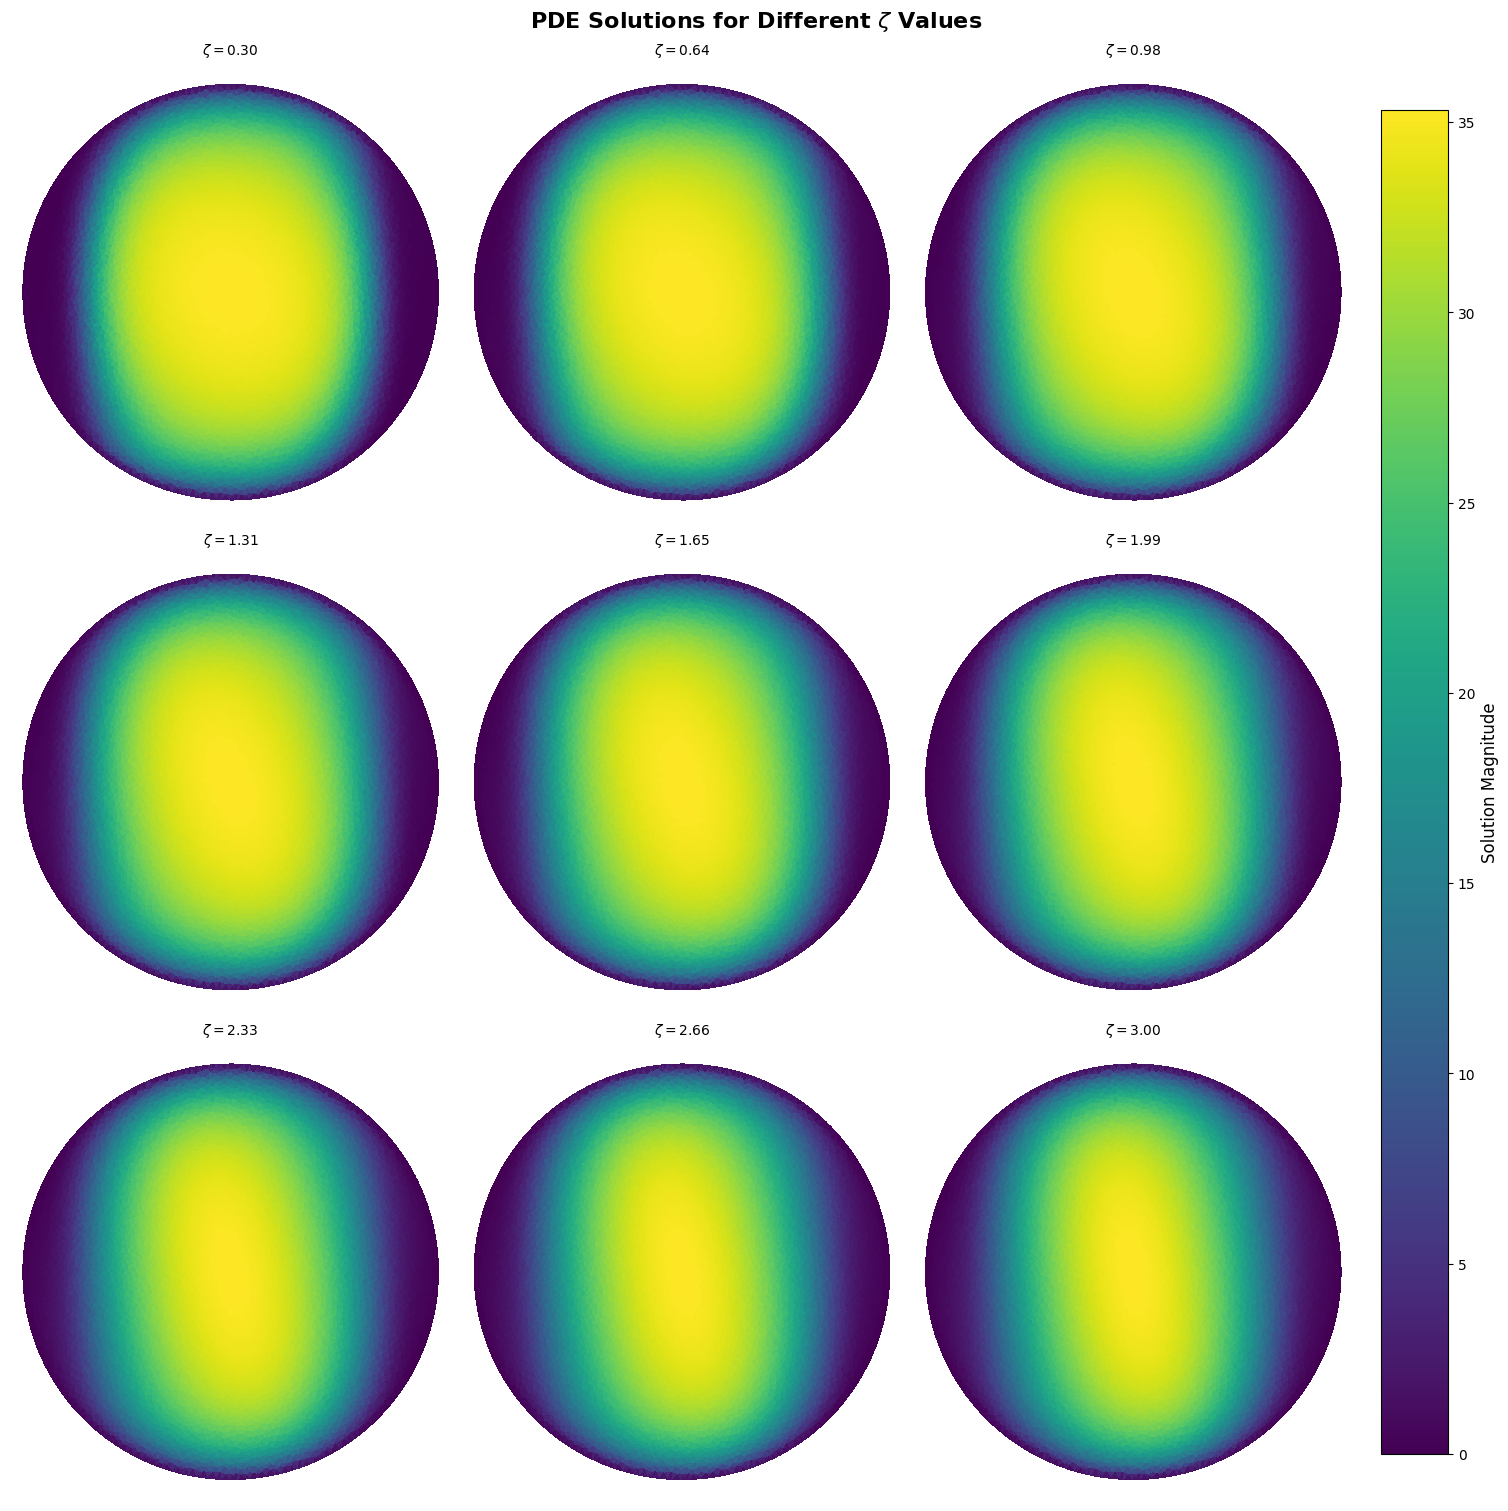

In [5]:
import fenics as fe
import mshr as msh
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.tri import Triangulation
from matplotlib import cm

# Fixed parameters
radius = 2
eps = 1e-3
zetas = np.linspace(0.3, 3, 9).tolist()  # Range of zeta values

# Create the mesh and function space
domain = msh.Circle(fe.Point(0, 0), radius)  # Circular domain of radius 2
mesh = msh.generate_mesh(domain, 50)  # Higher resolution mesh
V = fe.FunctionSpace(mesh, "P", 3)  # Cubic Lagrange elements

# Define boundary condition
tau_b = fe.Constant(0.0)

def boundary(x, on_boundary):
    return on_boundary

bc = fe.DirichletBC(V, tau_b, boundary)

# Test and trial functions, and source term
tau = fe.TrialFunction(V)
v = fe.TestFunction(V)
f = fe.Constant(-1.0)  # Source term

# Set up the 3x3 grid for plotting
fig, axes = plt.subplots(3, 3, figsize=(15, 15), constrained_layout=True)
fig.suptitle("PDE Solutions for Different $\\zeta$ Values", fontsize=16, weight="bold")

# Collect all solution values for color bar scaling
all_tau_values = []

# Solve for each zeta and plot the result
for idx, zeta in enumerate(zetas):
    i, j = divmod(idx, 3)
    ax = axes[i, j]

    # Define the vector field `b` and the diffusion tensor `diag`
    b = fe.Expression(("x[1]", "-x[0] - pow(x[0],3) - 2*zeta*x[1]"), degree=3, zeta=zeta)
    diag = fe.Expression((("eps", "0"), ("0", "zeta")), degree=0, eps=eps, zeta=zeta)

    # Define bilinear and linear forms
    a = (fe.dot(fe.dot(fe.grad(tau), b), v) - fe.dot(fe.dot(diag, fe.grad(tau)), fe.grad(v))) * fe.dx
    L = f * v * fe.dx

    # Compute the solution
    tau_h = fe.Function(V)

    fe.solve(a == L, tau_h, bc)

    # Interpolate the solution onto a linear function space for visualization
    V_linear = fe.FunctionSpace(mesh, "P", 1)
    tau_h_linear = fe.interpolate(tau_h, V_linear)

    # Extract vertex values and mesh connectivity for plotting
    coords = mesh.coordinates()
    connectivity = mesh.cells()
    tau_values = tau_h_linear.compute_vertex_values(mesh)
    all_tau_values.extend(tau_values)

    # Create a triangulation for Matplotlib
    triangulation = Triangulation(coords[:, 0], coords[:, 1], connectivity)

    # Plot the solution
    tpc = ax.tripcolor(triangulation, tau_values, cmap="viridis", shading="flat")
    ax.set_title(f"$\\zeta={zeta:.2f}$", fontsize=10, weight="bold")
    ax.axis("equal")
    ax.axis("off")

# Add a shared colorbar
if all_tau_values:  # Ensure there are valid solutions
    all_tau_values = np.array(all_tau_values)
    min_tau, max_tau = all_tau_values.min(), all_tau_values.max()
    norm = plt.Normalize(vmin=min_tau, vmax=max_tau)
    sm = cm.ScalarMappable(cmap="viridis", norm=norm)
    sm.set_array([])

    # Add colorbar to the figure
    cbar = fig.colorbar(sm, ax=axes, orientation="vertical", fraction=0.05, pad=0.02)
    cbar.set_label("Solution Magnitude", fontsize=12)
    cbar.ax.tick_params(labelsize=10)

plt.show()

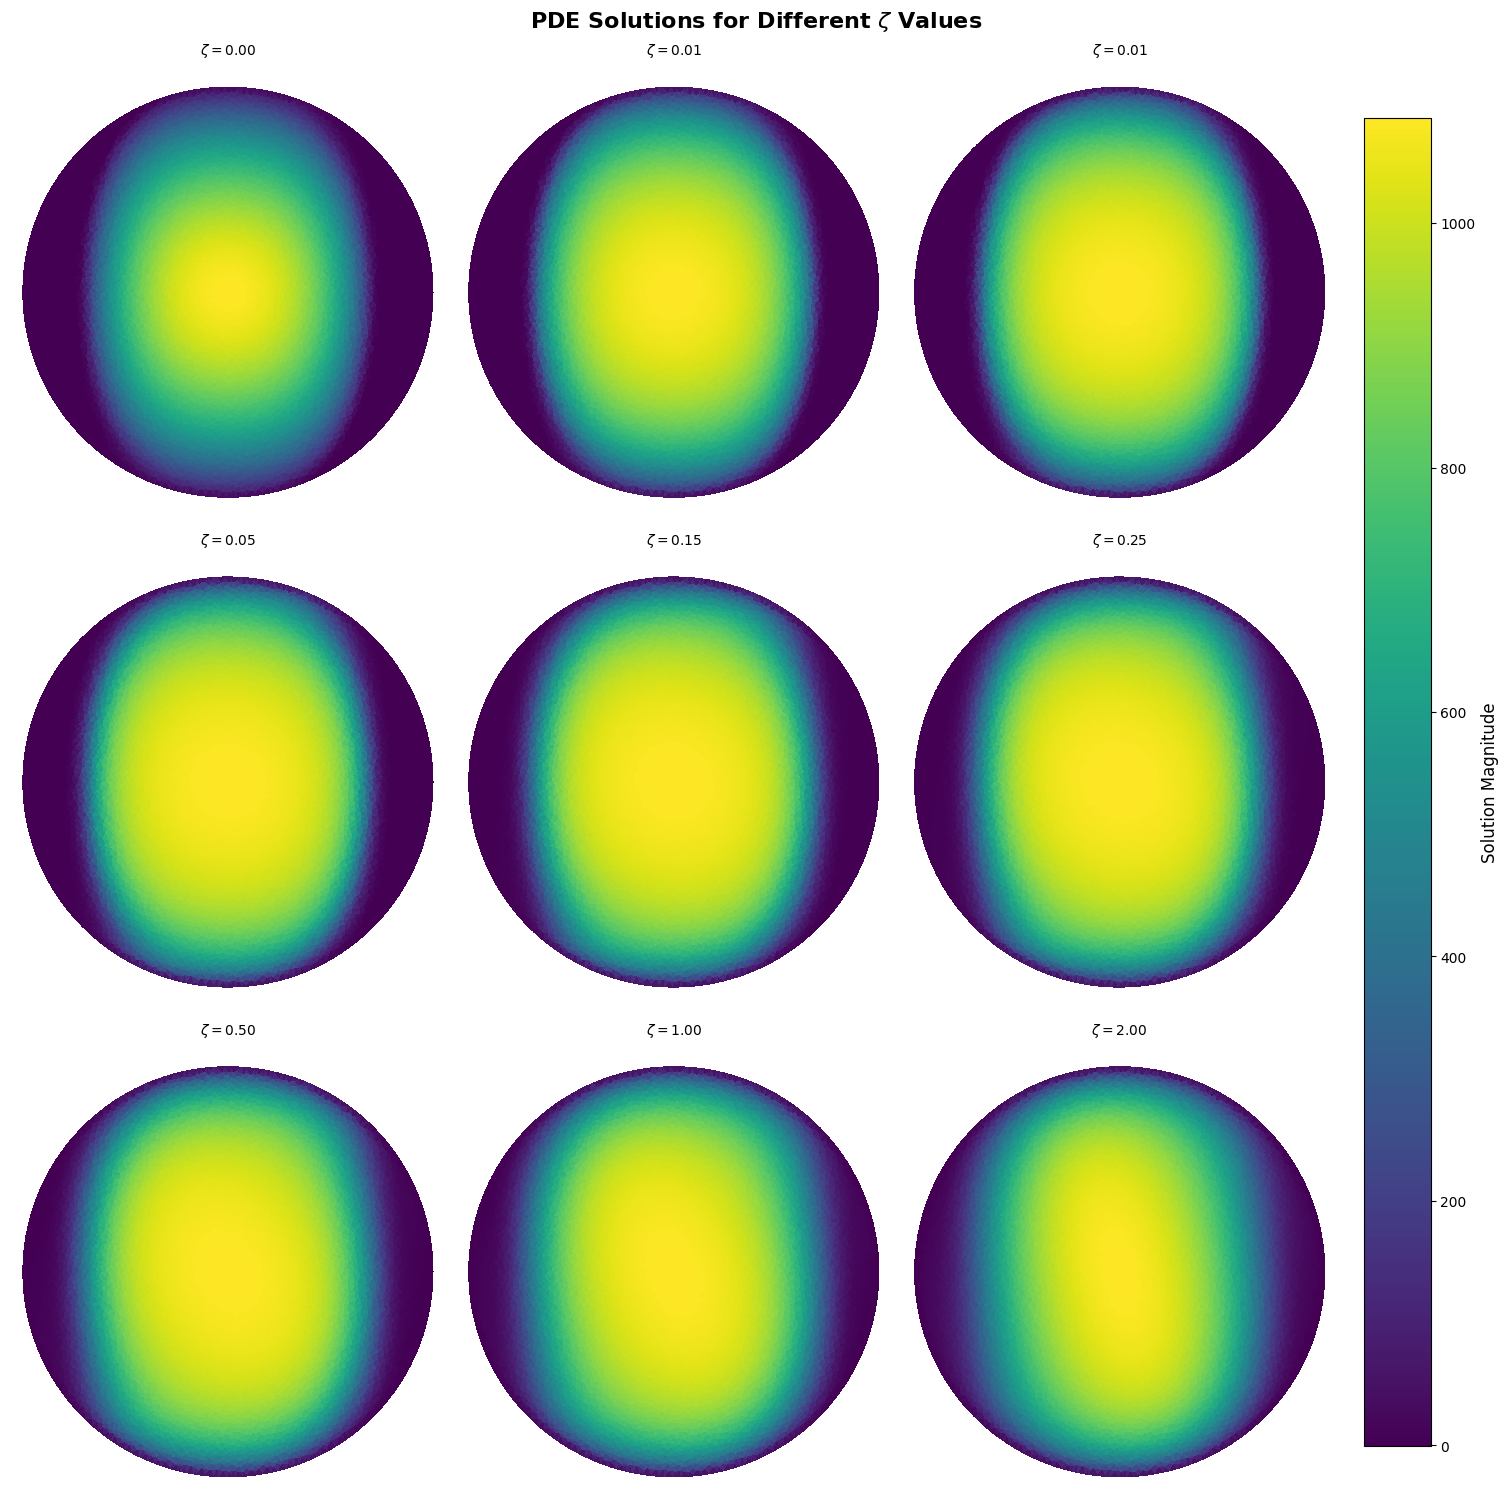

In [10]:
import fenics as fe
import mshr as msh
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.tri import Triangulation
from matplotlib import cm

# Fixed parameters
radius = 2
eps = 1e-3
zetas = [0.001, 0.005, 0.01,\
         0.05,  0.15,  0.25,\
         0.5,   1,     2]#np.linspace(0.005, 0.1, 9).tolist()  # Range of zeta values

# Create the mesh and function space
domain = msh.Circle(fe.Point(0, 0), radius)  # Circular domain of radius 2
mesh = msh.generate_mesh(domain, 50)  # Higher resolution mesh
V = fe.FunctionSpace(mesh, "P", 3)  # Cubic Lagrange elements

# Define boundary condition
tau_b = fe.Constant(0.0)

def boundary(x, on_boundary):
    return on_boundary

bc = fe.DirichletBC(V, tau_b, boundary)

# Test and trial functions, and source term
tau = fe.TrialFunction(V)
v = fe.TestFunction(V)
f = fe.Constant(-1.0)  # Source term

# Set up the 3x3 grid for plotting
fig, axes = plt.subplots(3, 3, figsize=(15, 15), constrained_layout=True)
fig.suptitle("PDE Solutions for Different $\\zeta$ Values", fontsize=16, weight="bold")

# Collect all solution values for color bar scaling
all_tau_values = []

# Solve for each zeta and plot the result
for idx, zeta in enumerate(zetas):
    i, j = divmod(idx, 3)
    ax = axes[i, j]

    # Define the vector field `b` and the diffusion tensor `diag`
    b = fe.Expression(
        ("x[1]", "-x[0] - pow(x[0], 3) - 2*zeta*x[1]"),
        degree=3, zeta=zeta
    )
    diag = fe.Expression(
        (("eps", "0"), ("0", "zeta")),
        degree=0, eps=eps, zeta=zeta
    )

    # Define bilinear and linear forms (unchanged PDE)
    a = (fe.dot(fe.dot(fe.grad(tau), b), v)
         - fe.dot(fe.dot(diag, fe.grad(tau)), fe.grad(v))) * fe.dx
    L = f * v * fe.dx

    # Compute the solution
    tau_h = fe.Function(V)
    fe.solve(a == L, tau_h, bc)

    # Interpolate the solution onto a linear function space for visualization
    V_linear = fe.FunctionSpace(mesh, "P", 1)
    tau_h_linear = fe.interpolate(tau_h, V_linear)

    # Extract vertex values and mesh connectivity for plotting
    coords = mesh.coordinates()
    connectivity = mesh.cells()
    tau_values = tau_h_linear.compute_vertex_values(mesh)
    all_tau_values.extend(tau_values)

    # Create a triangulation for Matplotlib
    triangulation = Triangulation(coords[:, 0], coords[:, 1], connectivity)

    # Plot the solution
    tpc = ax.tripcolor(triangulation, tau_values, cmap="viridis", shading="flat")
    ax.set_title(f"$\\zeta={zeta:.2f}$", fontsize=10, weight="bold")
    ax.axis("equal")
    ax.axis("off")

# Add a shared colorbar
if all_tau_values:  # Ensure there are valid solutions
    all_tau_values = np.array(all_tau_values)
    min_tau, max_tau = all_tau_values.min(), all_tau_values.max()
    norm = plt.Normalize(vmin=min_tau, vmax=max_tau)
    sm = cm.ScalarMappable(cmap="viridis", norm=norm)
    sm.set_array([])

    # Add colorbar to the figure
    cbar = fig.colorbar(sm, ax=axes, orientation="vertical", fraction=0.05, pad=0.02)
    cbar.set_label("Solution Magnitude", fontsize=12)
    cbar.ax.tick_params(labelsize=10)

plt.show()

In [11]:
import fenics as fe
import mshr as msh
from matplotlib import pyplot as plt
from matplotlib.tri import Triangulation

def plot_pde_solution(zeta, epsilon, meshsize):
    """
    Solve and plot the solution of the PDE for given zeta, epsilon, and meshsize.

    Parameters:
    - zeta (float): Parameter controlling the damping term.
    - epsilon (float): Diffusion coefficient.
    - meshsize (int): Mesh resolution; higher value gives finer mesh.

    Returns:
    - None: Displays the solution plot.
    """
    # Create the domain and mesh
    radius = 2
    domain = msh.Circle(fe.Point(0, 0), radius)
    mesh = msh.generate_mesh(domain, meshsize)

    # Define the function space
    V = fe.FunctionSpace(mesh, "P", 3)  # Cubic Lagrange elements

    # Define boundary condition
    tau_b = fe.Constant(0.0)

    def boundary(x, on_boundary):
        return on_boundary

    bc = fe.DirichletBC(V, tau_b, boundary)

    # Define test and trial functions
    tau = fe.TrialFunction(V)
    v = fe.TestFunction(V)

    # Define the source term
    f = fe.Constant(-1.0)

    # Define the vector field `b` and diffusion tensor `diag`
    b = fe.Expression(
        ("x[1]", "-x[0] - pow(x[0], 3) - 2*zeta*x[1]"),
        degree=3, zeta=zeta
    )
    diag = fe.Expression(
        (("epsilon", "0"), ("0", "zeta")),
        degree=0, epsilon=epsilon, zeta=zeta
    )

    # Define the bilinear form and linear form
    a = (fe.dot(fe.dot(fe.grad(tau), b), v)
         - fe.dot(fe.dot(diag, fe.grad(tau)), fe.grad(v))) * fe.dx
    L = f * v * fe.dx

    # Solve the PDE
    tau_h = fe.Function(V)
    fe.solve(a == L, tau_h, bc)

    # Interpolate the solution to a linear function space for plotting
    V_linear = fe.FunctionSpace(mesh, "P", 1)
    tau_h_linear = fe.interpolate(tau_h, V_linear)

    # Extract vertex values and mesh connectivity for Matplotlib
    coords = mesh.coordinates()
    connectivity = mesh.cells()
    tau_values = tau_h_linear.compute_vertex_values(mesh)

    # Create a triangulation for Matplotlib
    triangulation = Triangulation(coords[:, 0], coords[:, 1], connectivity)

    # Plot the solution
    plt.figure(figsize=(8, 6))
    plt.tripcolor(triangulation, tau_values, cmap="viridis", shading="flat")
    plt.colorbar(label="Solution Magnitude")
    plt.title(f"Solution of PDE with $\\zeta={zeta}$, $\\epsilon={epsilon}$, Meshsize={meshsize}")
    plt.axis("equal")
    plt.axis("off")
    plt.show()

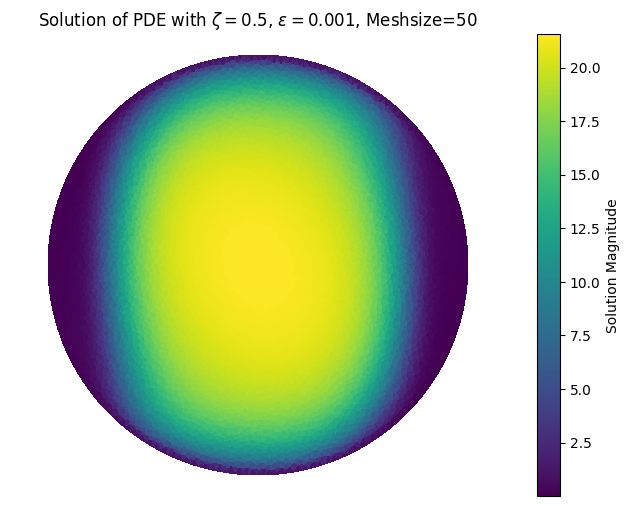

In [12]:
# Example usage
plot_pde_solution(zeta=0.5, epsilon=1e-3, meshsize=50)

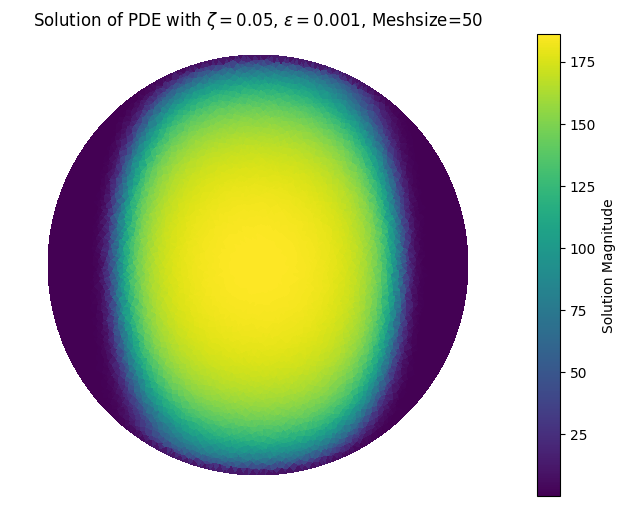

In [13]:
# Example usage
plot_pde_solution(zeta=0.05, epsilon=1e-3, meshsize=50)

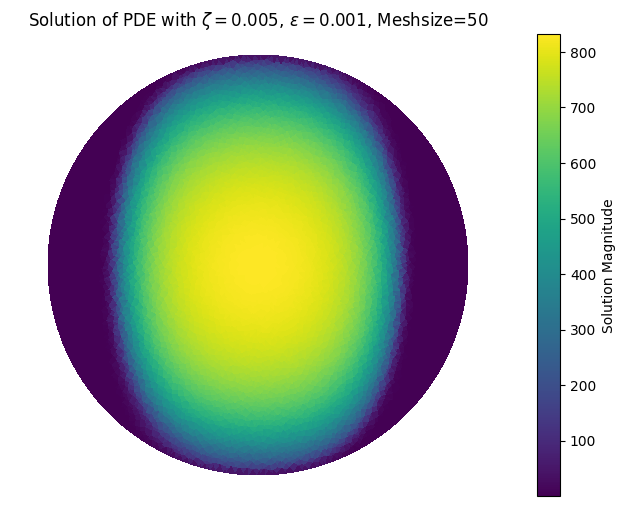

In [14]:
# Example usage
plot_pde_solution(zeta=0.005, epsilon=1e-3, meshsize=50)

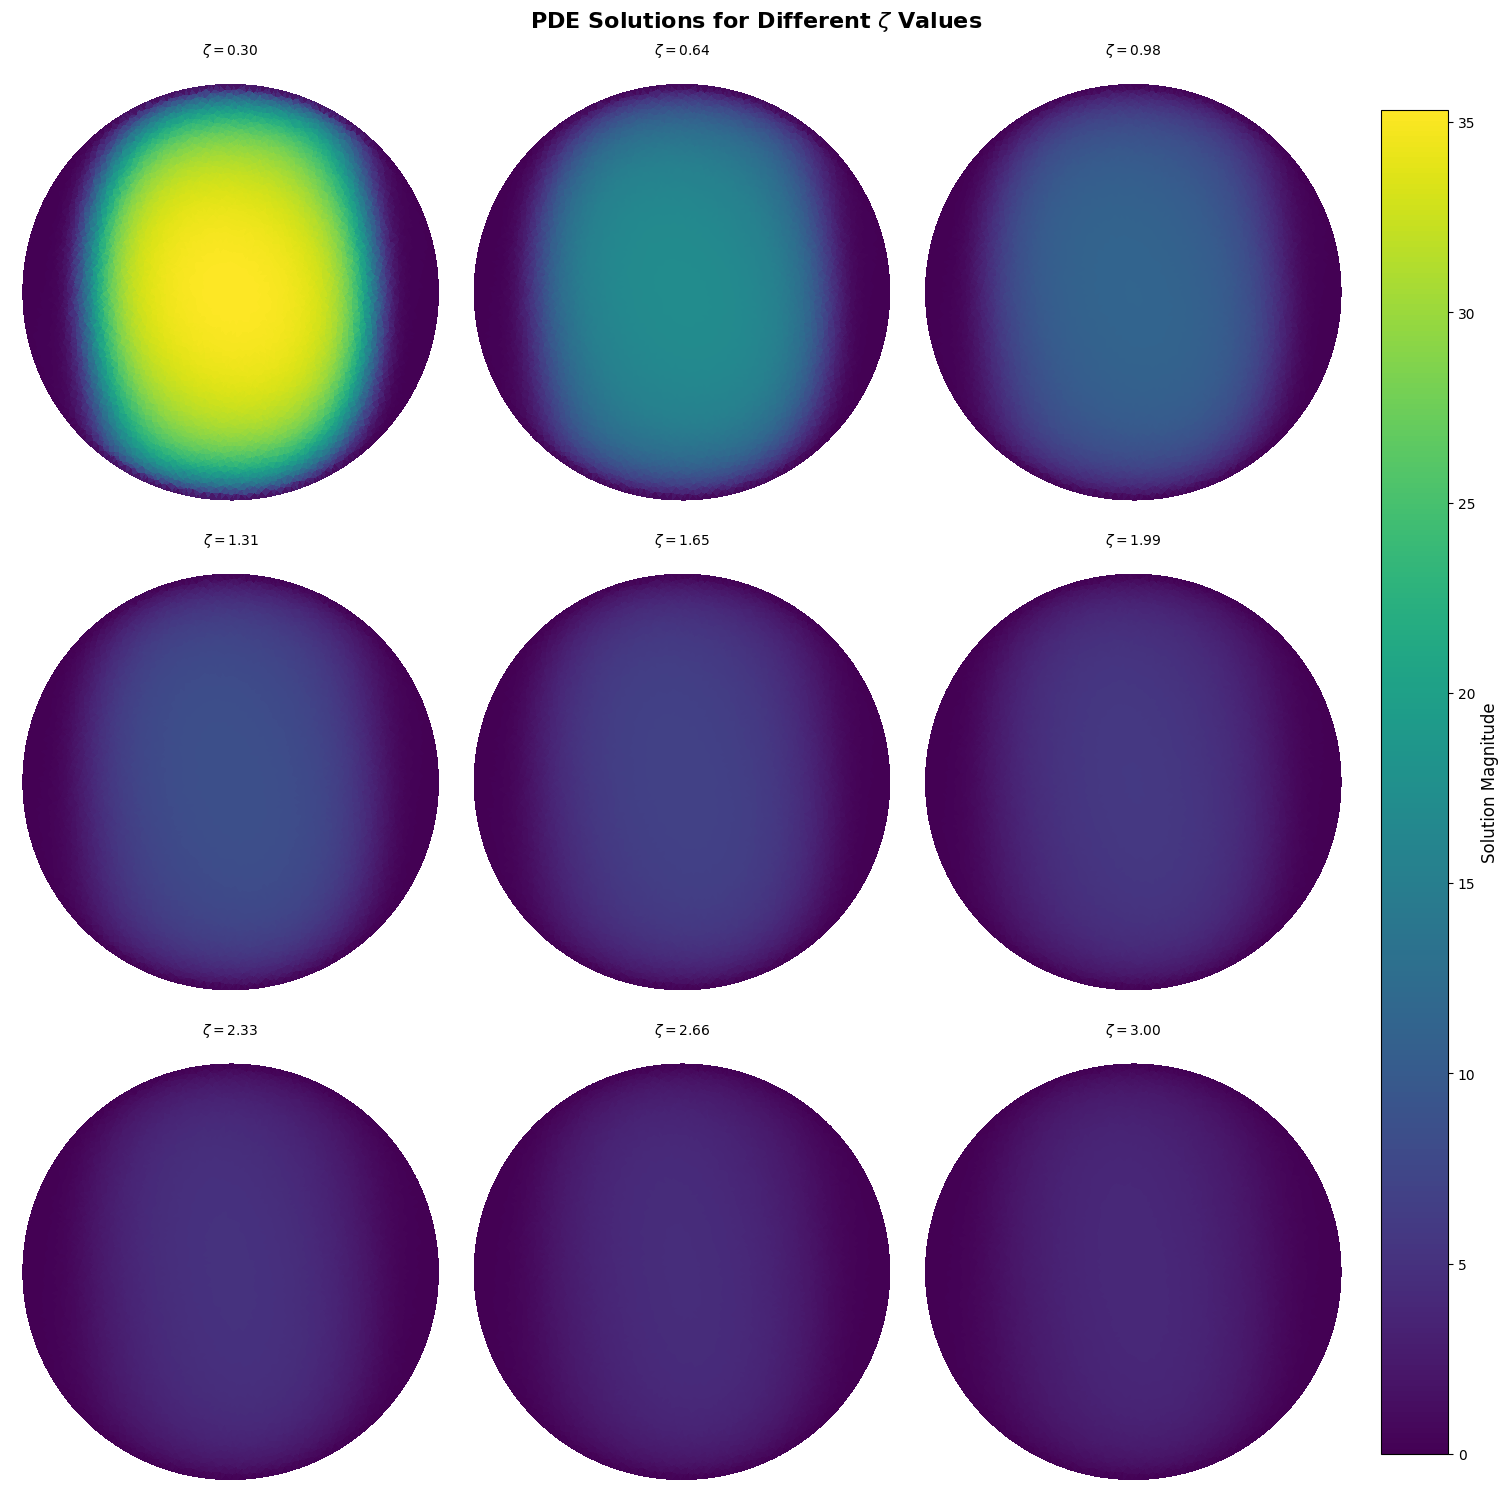

In [15]:
import fenics as fe
import mshr as msh
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.tri import Triangulation
from matplotlib import cm

# Fixed parameters
radius = 2
eps = 1e-3
zetas = np.linspace(0.3, 3, 9).tolist()  # Range of zeta values

# Create the domain and mesh
domain = msh.Circle(fe.Point(0, 0), radius)  # Circular domain of radius 2
mesh = msh.generate_mesh(domain, 50)  # Higher resolution mesh
V = fe.FunctionSpace(mesh, "P", 3)  # Cubic Lagrange elements

# Define boundary condition
tau_b = fe.Constant(0.0)

def boundary(x, on_boundary):
    return on_boundary

bc = fe.DirichletBC(V, tau_b, boundary)

# Test and trial functions, and source term
tau = fe.TrialFunction(V)
v = fe.TestFunction(V)
f = fe.Constant(-1.0)  # Source term

# Precompute solutions to determine global min/max for colorbar
solutions = []
for zeta in zetas:
    # Define the vector field `b` and diffusion tensor `diag`
    b = fe.Expression(
        ("x[1]", "-x[0] - pow(x[0], 3) - 2*zeta*x[1]"),
        degree=3, zeta=zeta
    )
    diag = fe.Expression(
        (("eps", "0"), ("0", "zeta")),
        degree=0, eps=eps, zeta=zeta
    )

    # Define bilinear and linear forms
    a = (fe.dot(fe.dot(fe.grad(tau), b), v)
         - fe.dot(fe.dot(diag, fe.grad(tau)), fe.grad(v))) * fe.dx
    L = f * v * fe.dx

    # Compute the solution
    tau_h = fe.Function(V)
    fe.solve(a == L, tau_h, bc)

    # Interpolate the solution onto a linear function space for visualization
    V_linear = fe.FunctionSpace(mesh, "P", 1)
    tau_h_linear = fe.interpolate(tau_h, V_linear)

    # Extract vertex values
    tau_values = tau_h_linear.compute_vertex_values(mesh)
    solutions.append(tau_values)

# Determine global min/max for the colorbar
all_tau_values = np.array([val for sol in solutions for val in sol])
vmin, vmax = all_tau_values.min(), all_tau_values.max()

# Set up the 3x3 grid for plotting
fig, axes = plt.subplots(3, 3, figsize=(15, 15), constrained_layout=True)
fig.suptitle("PDE Solutions for Different $\\zeta$ Values", fontsize=16, weight="bold")

# Plot each solution
for idx, zeta in enumerate(zetas):
    i, j = divmod(idx, 3)
    ax = axes[i, j]

    # Extract mesh coordinates and connectivity
    coords = mesh.coordinates()
    connectivity = mesh.cells()
    triangulation = Triangulation(coords[:, 0], coords[:, 1], connectivity)

    # Plot the solution with fixed colorbar range
    ax.tripcolor(triangulation, solutions[idx], cmap="viridis", shading="flat", vmin=vmin, vmax=vmax)
    ax.set_title(f"$\\zeta={zeta:.2f}$", fontsize=10, weight="bold")
    ax.axis("equal")
    ax.axis("off")

# Add a shared colorbar
norm = plt.Normalize(vmin=vmin, vmax=vmax)
sm = cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])

# Add colorbar to the figure
cbar = fig.colorbar(sm, ax=axes, orientation="vertical", fraction=0.05, pad=0.02)
cbar.set_label("Solution Magnitude", fontsize=12)
cbar.ax.tick_params(labelsize=10)

plt.show()